# Module 2 (Data visualization and Technical Analysis)

# Problem Statement 2.1
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.
1. Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock
2. This would be helpful if we are to train our model to take NLP inputs.

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from functools import partial
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("week2.csv")#loading week2.csv file
del data['Unnamed: 0']
raw_data = data 
data.head()#loading first few lines of week2.csv file

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
0,HDFC,EQ,2017-05-15,1549.80,1554.5,1572.60,1554.10,1561.0,1559.50,1562.62,1270297,1.984990e+09,59917,955875,75.25,5,2017,1559.500000,0.000000,Slight or No change
1,HDFC,EQ,2017-05-16,1559.50,1558.0,1569.00,1554.00,1568.0,1566.55,1564.05,2114918,3.307844e+09,79354,1652379,78.13,5,2017,1563.904498,0.004521,Slight or No change
2,HDFC,EQ,2017-05-17,1566.55,1565.5,1570.95,1549.75,1550.1,1552.50,1557.08,2161434,3.365526e+09,80317,1794472,83.02,5,2017,1559.460361,-0.008969,Slight or No change
3,HDFC,EQ,2017-05-18,1552.50,1547.0,1558.60,1526.50,1545.0,1537.05,1539.03,2404372,3.700407e+09,85842,1837821,76.44,5,2017,1552.683515,-0.009952,Slight or No change
4,HDFC,EQ,2017-05-19,1537.05,1545.0,1548.00,1515.35,1526.5,1520.60,1526.14,2142433,3.269652e+09,113875,1601236,74.74,5,2017,1545.873479,-0.010702,Slight or No change


In [3]:
data['Date'] = data['Date'].astype('datetime64[ns]')
data.Date.dtype

dtype('<M8[ns]')

In [4]:
data.set_index('Date', inplace = True)
data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,HDFC,EQ,1549.80,1554.50,1572.60,1554.10,1561.00,1559.50,1562.62,1270297,1.984990e+09,59917,955875,75.25,5,2017,1559.500000,0.000000,Slight or No change
2017-05-16,HDFC,EQ,1559.50,1558.00,1569.00,1554.00,1568.00,1566.55,1564.05,2114918,3.307844e+09,79354,1652379,78.13,5,2017,1563.904498,0.004521,Slight or No change
2017-05-17,HDFC,EQ,1566.55,1565.50,1570.95,1549.75,1550.10,1552.50,1557.08,2161434,3.365526e+09,80317,1794472,83.02,5,2017,1559.460361,-0.008969,Slight or No change
2017-05-18,HDFC,EQ,1552.50,1547.00,1558.60,1526.50,1545.00,1537.05,1539.03,2404372,3.700407e+09,85842,1837821,76.44,5,2017,1552.683515,-0.009952,Slight or No change
2017-05-19,HDFC,EQ,1537.05,1545.00,1548.00,1515.35,1526.50,1520.60,1526.14,2142433,3.269652e+09,113875,1601236,74.74,5,2017,1545.873479,-0.010702,Slight or No change
2017-05-22,HDFC,EQ,1520.60,1530.00,1530.00,1510.25,1519.95,1519.85,1518.84,1920867,2.917481e+09,70390,1541085,80.23,5,2017,1541.712808,-0.000493,Slight or No change
2017-05-23,HDFC,EQ,1519.85,1521.70,1537.20,1503.45,1510.00,1511.50,1521.20,1408855,2.143149e+09,56848,969791,68.84,5,2017,1538.541765,-0.005494,Slight or No change
2017-05-24,HDFC,EQ,1511.50,1519.00,1541.75,1512.40,1525.00,1524.85,1527.90,2209471,3.375851e+09,75808,1361319,61.61,5,2017,1536.606612,0.008832,Slight or No change
2017-05-25,HDFC,EQ,1524.85,1533.90,1546.00,1530.50,1539.00,1539.75,1539.88,4099792,6.313184e+09,91104,3327557,81.16,5,2017,1537.259711,0.009771,Slight or No change


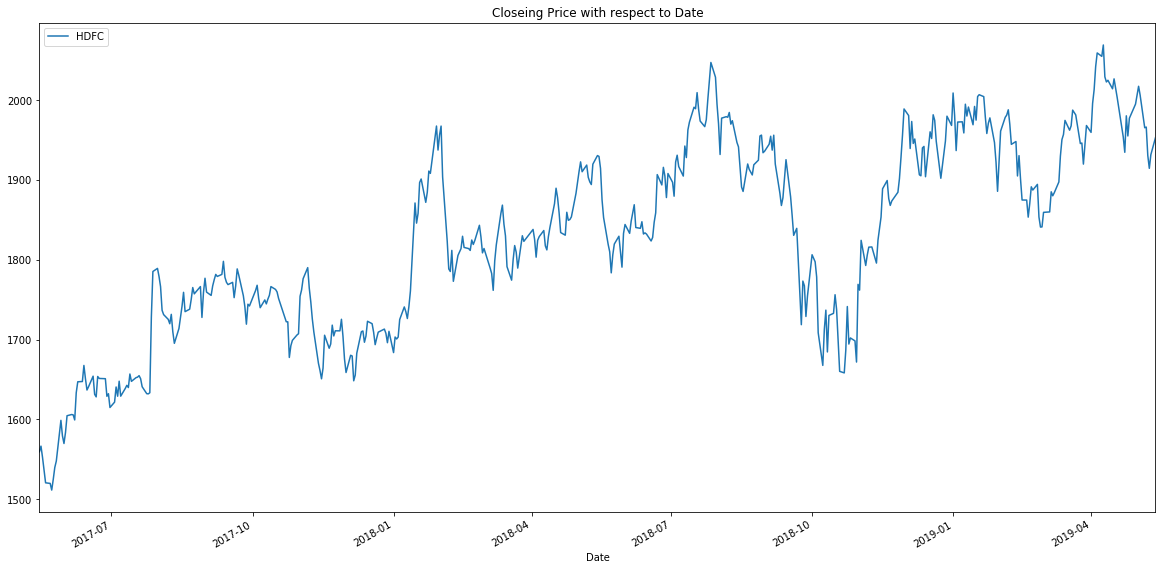

In [5]:
%matplotlib inline
data['Close Price'].plot(label='HDFC',figsize=(20,10),title="Closeing Price with respect to Date")
plt.legend()

In [6]:
data['Close Price'].diff().abs().sort_values(ascending= False)

Date
2018-09-24    120.70
2018-01-15    110.25
2018-10-31     97.35
2017-07-27     94.75
2018-02-05     80.50
2018-10-19     77.55
2018-10-05     69.80
2018-02-02     63.70
2018-11-02     62.40
2018-01-29     59.30
2017-07-28     57.15
2018-12-17     56.25
2018-10-24     54.70
2018-09-25     54.65
2018-10-11     52.40
2018-10-01     51.85
2017-05-29     50.95
2018-08-16     50.30
2019-04-22     49.85
2018-06-22     47.85
2018-09-14     47.65
2018-10-25     47.00
2017-11-01     46.90
2018-09-17     46.60
2018-12-24     46.45
2018-10-12     45.75
2019-04-24     45.70
2018-08-03     45.55
2018-10-09     45.05
2018-12-10     44.85
               ...  
2017-10-31      1.60
2017-06-05      1.50
2018-06-15      1.50
2018-06-14      1.45
2018-02-19      1.45
2017-07-26      1.40
2018-12-11      1.25
2018-08-29      1.10
2018-05-15      1.05
2018-06-11      1.00
2018-04-26      0.95
2017-12-05      0.90
2019-05-07      0.85
2017-12-12      0.85
2017-05-22      0.75
2018-08-07      0.70
2017-07-

In [7]:
import bs4
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests 
# On finding dates, the news were availabe for following dates. 
# 1. Jan 15, 2018
# 2. Jul 27, 2018
# 3. Oct 19, 2018  

news_url_15_01 = 'https://www.moneycontrol.com/news/business/stocks/buy-hdfc-bank-says-mitessh-thakkar-2483539.html'
news = requests.get(news_url_15_01) 
#Printing news content 
soup = BeautifulSoup(news.content,"html.parser")
News_title = soup.find('div',class_ = 'article_box')
News_subhead = soup.find('div',class_ = 'brk_wraper clearfix')
News_body = soup.find('div',class_ = 'arti-flow')
print("News for Jan 15, 2018")
print('\n')
print("Title:")
print (News_title.h1.text)
print('\n')
print("Subject:")
print (News_subhead.h2.text)
print('\n')
print("Report:")
for p in News_body:
    Report = soup.find('p').text
print(Report)
print('\n')
print("///////////////////////////////////////////////////////////////////////////////////////////////////////////////")
print('\n')
news_url_27_07 = 'https://www.moneycontrol.com/news/business/companies/ihh-open-offer-for-fortis-to-commence-on-sept-7-2773941.html'
news = requests.get(news_url_27_07) 
#Printing news content 
soup = BeautifulSoup(news.content,"html.parser")
News_title = soup.find('div',class_ = 'article_box')
News_subhead = soup.find('div',class_ = 'brk_wraper clearfix')
News_body = soup.find('div',class_ = 'arti-flow')
print("News for Jul 27, 2018")
print('\n')
print("Title:")
print (News_title.h1.text)
print('\n')
print("Subject:")
print (News_subhead.h2.text)
print('\n')
print("Report:")
for p in News_body:
    Report = soup.find('p').text
print(Report)
print('\n')
print("///////////////////////////////////////////////////////////////////////////////////////////////////////////////")
print('\n')
news_url_19_10 = 'https://www.moneycontrol.com/news/business/markets/hdfc-bank-q2-earnings-preview-watch-out-for-these-5-key-factors-3065021.html'
news = requests.get(news_url_19_10) 
#Printing news content 
soup = BeautifulSoup(news.content,"html.parser")
News_title = soup.find('div',class_ = 'article_box')
News_subhead = soup.find('div',class_ = 'brk_wraper clearfix')
News_body = soup.find('div',class_ = 'arti-flow')
print("News for Oct 19, 2018")
print('\n')
print("Title:")
print (News_title.h1.text)
print('\n')
print("Subject:")
print (News_subhead.h2.text)
print('\n')
print("Report:")
for p in News_body:
    Report = soup.find('p').text
print(Report)
print('\n')

News for Jan 15, 2018


Title:
Buy HDFC Bank, says Mitessh Thakkar


Subject:
Mitessh Thakkar of mitesshthakkar.com advises buying HDFC Bank.


Report:
Mitessh Thakkar of mitesshthakkar.com told CNBC-TV18, "HDFC Bank is a buy with a stoploss of Rs 1,884 for target of Rs 1,930."


///////////////////////////////////////////////////////////////////////////////////////////////////////////////


News for Jul 27, 2018


Title:
IHH open offer for Fortis to commence on Sept 7


Subject:
A draft letter of the offer to Fortis shareholders was submitted to the bourses by the managers to open offer -- HSBC Securities and Capital Markets (India) Pvt Ltd, HDFC Bank Ltd, Citigroup Global Markets India Pvt Ltd and Deutsche Equities India Pvt Ltd.


Report:
The open offer by Malaysian firm IHH Healthcare Berhad to acquire additional 26 percent stake in Fortis Healthcare will commence on September 7 and close on September 24, 2018, as per a regulatory filing by managers of the offer.


////////////////